## Regression

In [ ]:
import pandas as pd
from pandas import np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dfmerge = pd.read_csv("/content/drive/My Drive/mergeddata.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
dfmerge = dfmerge[dfmerge.ArrDelayMinutes>0]

In [ ]:
dfmerge['ArrDelayMinutes'].describe()

count    700439.000000
mean         37.695896
std          60.455691
min           1.000000
25%           7.000000
50%          17.000000
75%          44.000000
max        2142.000000
Name: ArrDelayMinutes, dtype: float64

In [ ]:
#regression using selected columns
feature_cols = ['windspeedKmph_x', 'winddirDegree_x', 'weatherCode_x', 'precipMM_x', 'visibility_x',
           'pressure_x', 'cloudcover_x', 'DewPointF_x', 'WindGustKmph_x', 'tempF_x',
           'WindChillF_x', 'humidity_x',"Year", "Quarter", "Month", "DayofMonth",
               "DepTime", "DepDel15", "CRSDepTime","DepDelayMinutes", 
       "OriginAirportID", "DestAirportID"]
X = dfmerge[feature_cols] #X value containing all data from feature columns
y = dfmerge.ArrDelayMinutes #y value containing target variable of arrival delay period

In [ ]:
# ss = y.iloc[:].values
# print(len(ss[ss==0]))
# print(len(ss[ss!=0]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient:ArrDelay'])  
coeff_df

,Coefficient:ArrDelay
windspeedKmph_x,0.035587
winddirDegree_x,-0.000554
weatherCode_x,0.009957
precipMM_x,0.164312
visibility_x,-0.093387
pressure_x,-0.089914
cloudcover_x,0.005697
DewPointF_x,0.040770
WindGustKmph_x,0.015050
tempF_x,0.146879


In [ ]:
y_pred = regressor.predict(X_test)
preddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preddf1 = preddf.head(25)

In [ ]:
preddf1

,Actual,Predicted
1248430,101.0,94.569381
357101,10.0,11.862228
527956,52.0,94.141797
908960,20.0,22.691540
1261467,37.0,43.066728
1799946,94.0,100.567990
503130,67.0,73.453584
1117956,4.0,16.534793
1058115,136.0,147.062790
411852,6.0,20.347469


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.654298736012976
Mean Squared Error: 247.91230222575382
Root Mean Squared Error: 15.745231094707814


In [ ]:
print(regressor.score(X_test, y_test))

0.9297349903825257


In [ ]:
from sklearn.svm import SVR

In [ ]:
clf3 = SVR()

In [ ]:
clf3.fit(X_train, y_train)

In [ ]:
y_pred3 = clf3.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

In [ ]:
print(clf3.score(X_test, y_test))

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 4.443e+05
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:48:05   Log-Likelihood:            -2.9196e+06
No. Observations:              700439   AIC:                         5.839e+06
Df Residuals:                  700416   BIC:                         5.840e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1127.2344     77.461    -

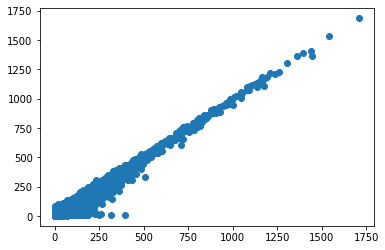

In [ ]:
plt.scatter(y_test, y_pred)

**XGB Regressor**

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor()

In [ ]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 10.375585848758886
Mean Squared Error: 235.62490661631077
Root Mean Squared Error: 15.350078391210605


In [ ]:
print(clf.score(X_test, y_test))

0.933217568547949


**extra trees regressor**

In [ ]:
clf2 = ensemble.ExtraTreesRegressor()
clf2.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred2 = clf2.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 10.528782955475608
Mean Squared Error: 235.11870662238502
Root Mean Squared Error: 15.33358101104843


In [ ]:
print(clf2.score(X_test, y_test))

0.9333610392314213


### **pipeline architechture**

In [ ]:
#reading dataframe from classification notebook
clfdf = pd.read_csv("/content/drive/My Drive/clfdataframe.csv",index_col=0)

In [ ]:
#dataframe containing classifier ArrDel15 values along with feature values
clfdf = clfdf.reset_index()
clfdf

,index,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDel15,ArrDelayMinutes,Year,FlightDate,Month,DayofMonth
0,1022499,16,247,113,0.0,10,1011,0,60,18,68,69,71,1900.0,1.0,1710,120.0,12892,12889,1.0,111.0,2017,2017-06-25,6,25
1,693032,25,85,113,0.0,10,1021,32,31,30,36,24,87,800.0,1.0,605,111.0,12478,10397,1.0,91.0,2017,2017-03-19,3,19
2,1101329,16,248,119,0.0,10,1016,68,59,18,64,63,87,1900.0,1.0,1730,75.0,12892,14771,1.0,61.0,2016,2016-06-13,6,13
3,901081,5,209,113,0.0,10,1014,15,47,9,71,71,48,2100.0,1.0,2015,32.0,12889,14771,1.0,27.0,2016,2016-04-12,4,12
4,1204838,8,187,122,0.2,6,1017,100,67,9,76,75,77,1300.0,1.0,1150,88.0,13204,13303,1.0,81.0,2016,2016-11-14,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,1436525,18,253,113,0.0,10,1017,15,50,19,76,78,38,1600.0,1.0,1545,37.0,13930,14747,1.0,22.0,2017,2017-06-27,6,27
82329,687845,13,177,113,0.0,10,1010,67,52,18,77,78,39,1800.0,1.0,1431,183.0,12266,14771,1.0,174.0,2017,2017-04-24,4,24
82330,1298779,10,145,200,0.1,9,1014,48,68,12,77,77,74,2300.0,1.0,2138,81.0,13303,14771,1.0,90.0,2016,2016-04-14,4,14
82331,811027,4,100,113,0.0,10,1023,0,25,4,67,68,30,1200.0,1.0,745,249.0,12889,11298,1.0,238.0,2016,2016-02-25,2,25


In [ ]:
#regression using selected features(weather data at the time of departure and flight details)
feature_cols = ['windspeedKmph_x', 'winddirDegree_x', 'weatherCode_x', 'precipMM_x', 'visibility_x',
           'pressure_x', 'cloudcover_x', 'DewPointF_x', 'WindGustKmph_x', 'tempF_x',
           'WindChillF_x', 'humidity_x',"Year", "Month", "DayofMonth",
              "CRSDepTime", 
       "OriginAirportID", "DestAirportID"]
X = clfdf[feature_cols] #X value containing all data from feature columns
y = clfdf.ArrDelayMinutes #y value containing target variable of arrival delay period

In [ ]:
#peforming linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor1 = LinearRegression()  
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#assessing the degree to which each feature affects the arrival delay mins
coeff_df1 = pd.DataFrame(regressor1.coef_, X.columns, columns=['Coefficient:ArrDelay'])  
coeff_df1

,Coefficient:ArrDelay
windspeedKmph_x,-1.192064
winddirDegree_x,0.001448
weatherCode_x,0.013066
precipMM_x,0.851120
visibility_x,-0.392135
pressure_x,-0.250042
cloudcover_x,-0.046276
DewPointF_x,0.255079
WindGustKmph_x,1.132939
tempF_x,-0.909762


In [ ]:
#showing actual vs predicted arrival delay minutes
y_pred1 = regressor1.predict(X_test)
preddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
preddf1 = preddf.head(25)

In [ ]:
preddf1

,Actual,Predicted
63163,35.0,71.156925
58717,7.0,76.610695
13372,17.0,59.893971
68133,26.0,99.840446
22681,23.0,58.529770
52263,55.0,76.389650
47567,164.0,69.131428
5208,3.0,67.639330
9114,23.0,48.701645
52089,54.0,55.880936


In [ ]:
#weather and flight data only
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 48.32936852615533
Mean Squared Error: 6097.349012745235
Root Mean Squared Error: 78.08552370795265


In [ ]:
#weather and flight data only
print(regressor1.score(X_test, y_test))

0.008215618377402811


**pipeline metrics considering weather + flight + departure details**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 12.58383267337579
Mean Squared Error: 325.0536186940057
Root Mean Squared Error: 18.02924343099304


In [ ]:
print(regressor1.score(X_test, y_test))

0.9471273332825877


In [ ]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 12.322019898362987
Mean Squared Error: 311.78801267814845
Root Mean Squared Error: 17.657520003617396


In [ ]:
print(clf.score(X_test, y_test))

0.9492850941113978


In [ ]:
clf2 = ensemble.ExtraTreesRegressor()
clf2.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred1 = clf2.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 12.939425821339649
Mean Squared Error: 333.00107207293377
Root Mean Squared Error: 18.248316965488456


In [ ]:
print(clf2.score(X_test, y_test))

0.9458346140830768
